<a href="https://www.kaggle.com/code/aurelegermain/svm-classification-with-opencv-bonus-knn?scriptVersionId=165861317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split

# Features example

We hare going to use the hog features from skimage. </br>
We take a sample image to illustrate it.

In [2]:
test_file = '/kaggle/input/neural-networks-homer-and-bart-classification/homer_bart_1/bart110.bmp'

test_image = cv2.imread(test_file) #We load the image

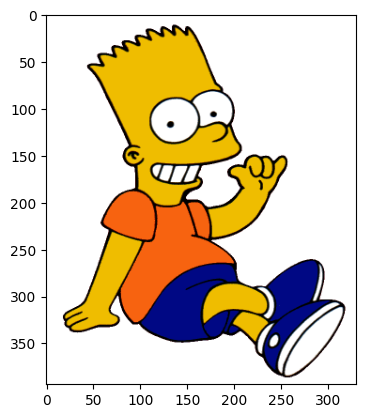

In [3]:
plt.imshow(test_image[...,::-1]) #OpenCV use the BGR format and matplotlib use RGB so we convert BGR to RGB

We need to resize the image to 128x128 while keeping its ratio.

In [4]:
h,w = test_image.shape[:2]
print(h,w)

394 330


In [5]:
ratio = w/h
ratio

0.8375634517766497

In [6]:
HEIGHT = 128
WIDTH = 128

Here, h/w is < 1, so the longuest border is h (vertical image), but h/w could be > 1 or equal to 1 for other images.

In [7]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY) #we convert it to 1 channel 

In [8]:
size_W = round(WIDTH*ratio)
test_image = cv2.resize(test_image, (size_W, HEIGHT)) #we resize the image

The test image without padding:

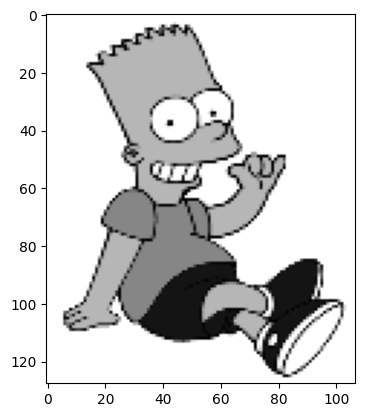

In [9]:
plt.imshow(test_image, cmap='gray')

In [10]:
pad_left = (WIDTH - size_W) // 2
pad_right = (WIDTH - size_W) - pad_left
img_padded = cv2.copyMakeBorder(test_image, 0, 0, pad_left, pad_right, cv2.BORDER_CONSTANT, value=255)

The test image with padding:

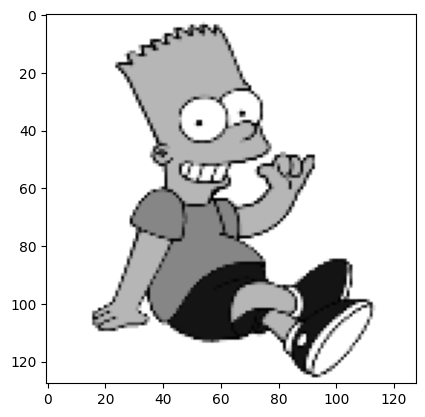

In [11]:
plt.imshow(img_padded, cmap='gray')

The HOG feature:

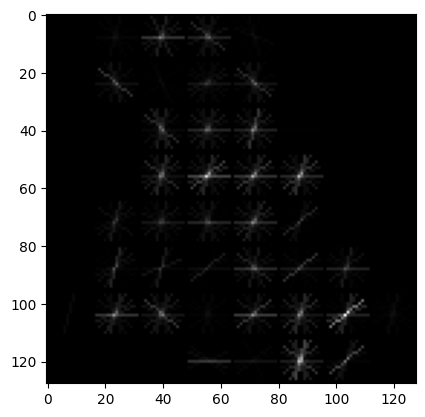

In [12]:
from skimage.feature import hog

test_image_features, test_hog_image = hog(img_padded,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

## This is what the hog feature looks like
plt.imshow(test_hog_image, cmap=plt.cm.gray)

# Dataset

In [13]:
import os

image_folder = '/kaggle/input/neural-networks-homer-and-bart-classification/homer_bart_1'
filenames = os.listdir(image_folder) #list of all the bmp images without folder
filenames.sort()
filenames[:10]

['bart1.bmp',
 'bart10.bmp',
 'bart100.bmp',
 'bart101.bmp',
 'bart102.bmp',
 'bart103.bmp',
 'bart104.bmp',
 'bart105.bmp',
 'bart106.bmp',
 'bart108.bmp']

In [14]:
labels = np.array([int('bart' in filename) for filename in filenames]) #the labels, 1 for bart and 0 for homer
labels.reshape((len(labels),1))
labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
#just to check if everything file has either "bart" or "homer" in its name
(sum((int('bart' in filename) for filename in filenames)) + sum((int('homer' in filename) for filename in filenames))) == len(filenames) 

True

In [16]:
labels_dic = {'Homer': 0, 'Bart': 1}
labels_dic

{'Homer': 0, 'Bart': 1}

In [17]:
number_images = {'Names': ['Homer', 'Bart'], 'Number': [len(labels) - np.sum(labels), np.sum(labels)]}
number_images

{'Names': ['Homer', 'Bart'], 'Number': [109, 160]}

<Axes: >

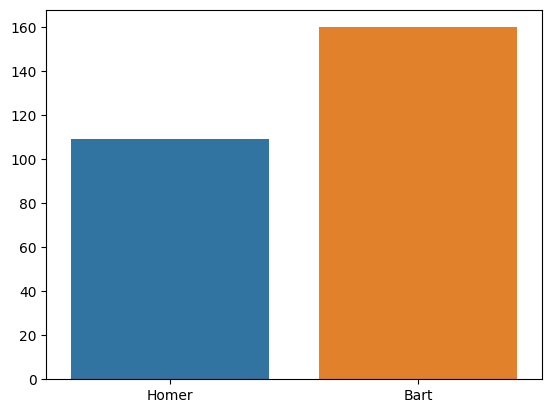

In [18]:
sns.barplot(number_images, x='Names', y='Number')

We split the datasets into train and test sets.

In [19]:
filenames_train, filenames_test, y_train, y_test = train_test_split(filenames, labels, test_size = 0.2, random_state = 4)

In [20]:
#This will resize the image and add padding if necessary
def resize_image(image):
    h,w = image.shape[:2]
    ratio = w/h
    
    if ratio > 1: #horizontal image
        size_H = round(HEIGHT/ratio) #we compute the vertical length to keep the desired ratio
        image = cv2.resize(image, (WIDTH, size_H)) #we resize the image
        diff_H = (HEIGHT - size_H) #we compute the total number of pixel to pad on top and bottom
        pad_top = diff_H // 2 #the number of pixel to pad on top is the total number of pixel to pad divided by 2
        pad_bottom = diff_H - pad_top #we don't want a rounding error so we compute the difference
        image = cv2.copyMakeBorder(image, pad_top, pad_bottom, 0, 0, cv2.BORDER_CONSTANT, value=255) #we add the padding
    elif ratio < 1: #vertical image
        size_W = round(WIDTH*ratio) #we compute the horizontal length to keep the desired ratio
        image = cv2.resize(image, (size_W, HEIGHT)) #we resize the image
        diff_W = (WIDTH - size_W) #we compute the total number of pixel to pad on the left and right
        pad_left = diff_W // 2 #the number of pixel to pad on the left is the total number of pixel to pad divided by 2
        pad_right = diff_W - pad_left #we don't want a rounding error so we compute the difference
        image = cv2.copyMakeBorder(image, 0, 0, pad_left, pad_right, cv2.BORDER_CONSTANT, value=255) #we add the padding
    elif ratio == 1: #square image
        image = cv2.resize(image, (WIDTH, HEIGHT))
    
    return image

In [21]:
#this will load the images into a list.
def load_data(list_images):
    df_images = []
    for image in list_images:
        image = os.path.join(image_folder, image) #we join the folder and image name to obtain the image path
        image = cv2.imread(image) #we read the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #we convert it to 1 channel (Gray scale)
        image = resize_image(image) #we resize it
        
        df_images.append(image) #we append the image to the list
    return df_images

In [22]:
images_train = load_data(filenames_train)
images_test = load_data(filenames_test)
images_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [23]:
#we want to verify if each image has the desired shape
sum(image.shape == (HEIGHT,WIDTH) for image in images_train)
print('The number of train images with the required shape is {} and the number of images in the train set is {}'.format(sum(image.shape == (HEIGHT,WIDTH) for image in images_train),len(images_train)))
print('The number of test images with the required shape is {} and the number of images in the test set is {}'.format(sum(image.shape == (HEIGHT,WIDTH) for image in images_test),len(images_test)))

The number of train images with the required shape is 215 and the number of images in the train set is 215
The number of test images with the required shape is 54 and the number of images in the test set is 54


The first 9 images of the train set:

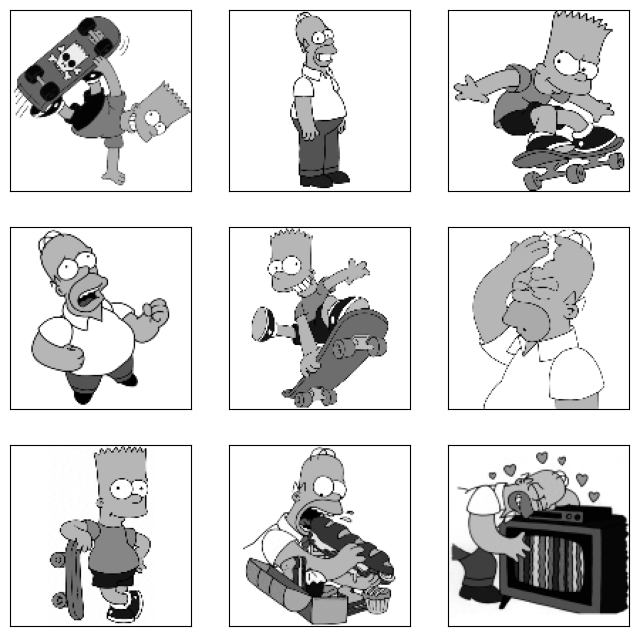

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
i = 0
for row in ax:
    for col in row:
        col.imshow(images_train[i], cmap='gray')
        col.set_xticks([])
        col.set_yticks([])
        i += 1

In [25]:
#This will compute the hog feature and append it to a list
def hog_feature(df_images):
    df_hogs = []
    for image in df_images:
        hog_features, hog_image = hog(image,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))
        df_hogs.append(hog_features)
    return df_hogs

In [26]:
hogs_train = hog_feature(images_train)
hogs_test = hog_feature(images_test)
hogs_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
hogs_train = np.array(hogs_train).astype(np.float32)
hogs_test = np.array(hogs_test).astype(np.float32)

# Model

We create the SVM model.

In [28]:
svm = cv2.ml.SVM_create()
#svm.setType(cv2.ml.SVM_C_SVC)
#svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

In [29]:
svm.trainAuto(hogs_train, cv2.ml.ROW_SAMPLE, y_train)

True

# Accuracy

In [30]:
y_pred = svm.predict(hogs_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_SVM = accuracy_score(y_test, y_pred[1])
accuracy_SVM

0.8148148148148148

# Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
cmx = confusion_matrix(y_test, y_pred[1], labels=list(labels_dic.values()))

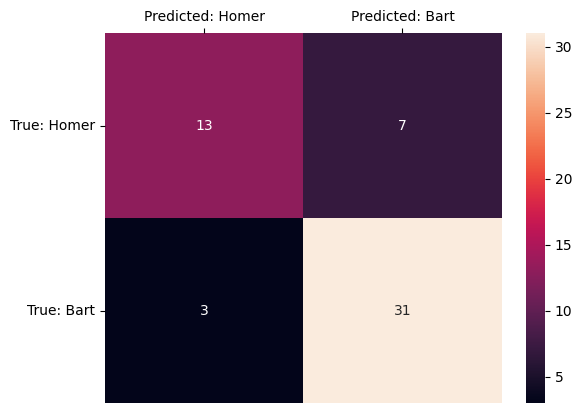

In [33]:
cmx_df = pd.DataFrame(cmx)
ax = sns.heatmap(cmx_df, annot=True)
ax.set_xticklabels(['Predicted: Homer', 'Predicted: Bart'])
ax.set_yticklabels(['True: Homer', 'True: Bart'])
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()

In [34]:
#a little function what will come in handy during this notebook
def show_cmx(y_pred):
    if type(y_pred) is tuple: y_pred = y_pred[1]
    cmx = confusion_matrix(y_test, y_pred, labels=list(labels_dic.values()))
    cmx_df = pd.DataFrame(cmx)
    ax = sns.heatmap(cmx_df, annot=True)
    ax.set_xticklabels(['Predicted: Homer', 'Predicted: Bart'])
    ax.set_yticklabels(['True: Homer', 'True: Bart'])
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.xaxis.tick_top()

# F1 score

In [35]:
from sklearn.metrics import f1_score
f1_scr = f1_score(y_test, y_pred[1])
f1_scr

0.861111111111111

# Misclassified examples

In [36]:
list_misclassified = [i for i in range(len(y_test)) if y_test[i] != y_pred[1][i]]
list_misclassified

[0, 1, 12, 15, 17, 18, 20, 29, 44, 45]

In [37]:
def show_misclassified(list_misclassified):
    for idx in list_misclassified:      
        image = os.path.join(image_folder, filenames_test[idx]) #we join the folder and image name to obtain the image path
        image = cv2.imread(image) #we read the image
        #image = cv2.resize(image, (128, 128)) #we resize it
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #we convert it to RGB as cv2 use the BGR format
        plt.imshow(image)
        plt.show()

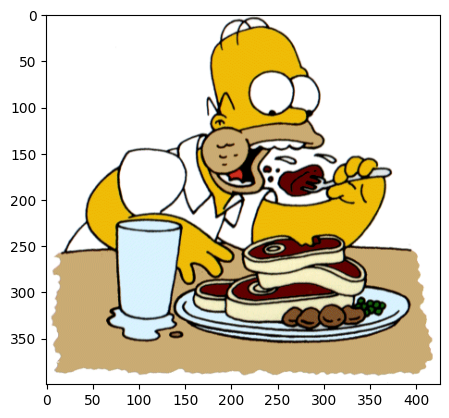

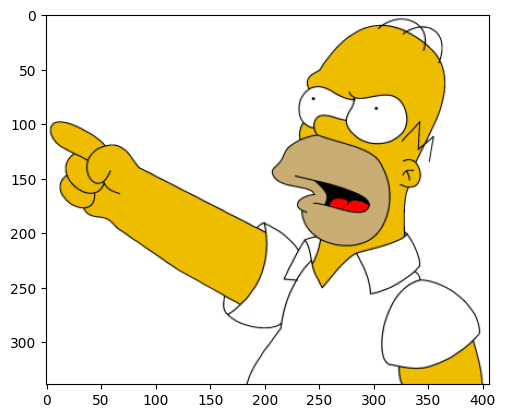

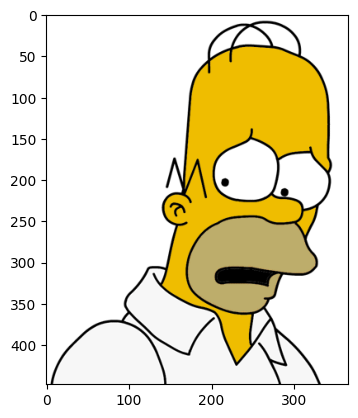

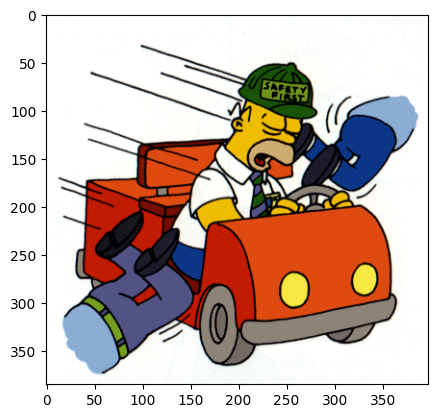

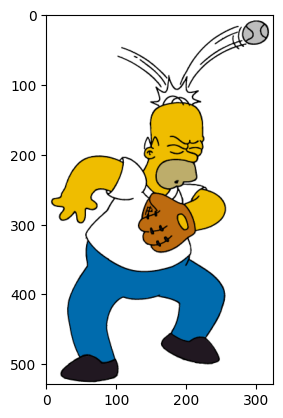

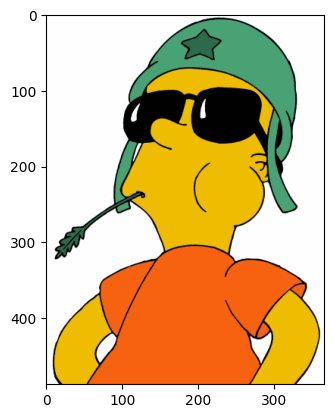

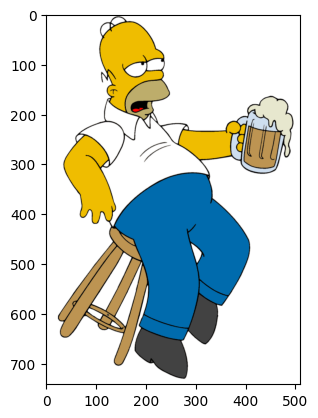

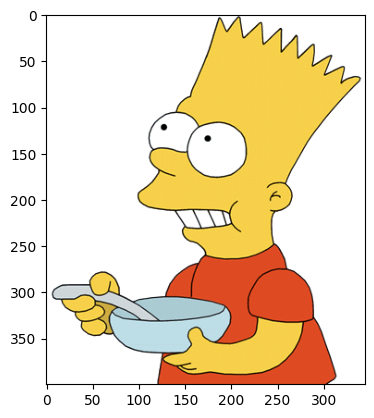

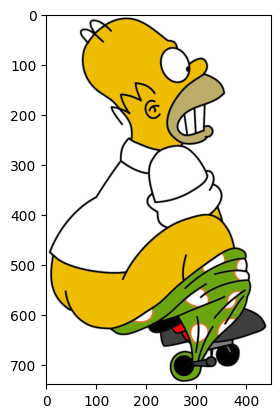

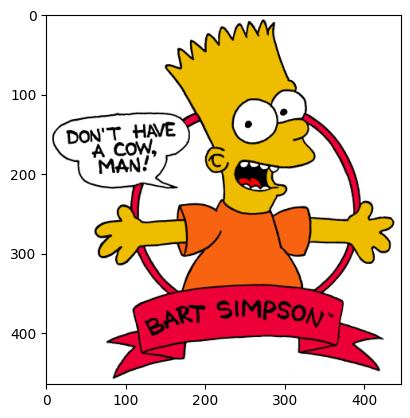

In [38]:
show_misclassified(list_misclassified)

# SVM with only pixels value

What would happen if we only used the grayscale images as feature instead of the hog ?

In [39]:
images_train = np.array(images_train).astype(np.float32)
images_test = np.array(images_test).astype(np.float32)

As an image is a 2 dimensional array we need to flatten each images into a 1 dimensional array.

In [40]:
images_train_flat = images_train.reshape(len(images_train), -1)
images_test_flat = images_test.reshape(len(images_test), -1)

We create the second svm model.

In [41]:
svm_pixels = cv2.ml.SVM_create()
#svm.setType(cv2.ml.SVM_C_SVC)
#svm.setKernel(cv2.ml.SVM_LINEAR)
svm_pixels.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

In [42]:
svm_pixels.trainAuto(images_train_flat, cv2.ml.ROW_SAMPLE, y_train)

True

In [43]:
y_pred_flat = svm_pixels.predict(images_test_flat)

We compute the accuracy.

In [44]:
accuracy_flat_SVM = accuracy_score(y_test, y_pred_flat[1])
accuracy_flat_SVM

0.6296296296296297

We plot the confusion matrix

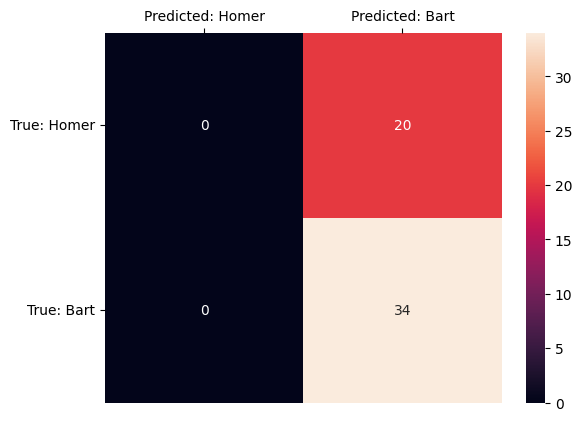

In [45]:
show_cmx(y_pred_flat)

Looking at the confucsion matrix, it seems that the model just classified everything as "Bart".

# KNN classification

**With flattened images**

We initialize the KNN and train it on the flat train dataset.

In [46]:
knn = cv2.ml.KNearest_create()
knn.train(images_train_flat, cv2.ml.ROW_SAMPLE, y_train)

True

We want to find the best value of k (the number of neighbours to take into account).

In [47]:
k_list =  [i + 1 for i in range(10)]
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
k_results = []

for k in k_list:
    _,result,_,_ = knn.findNearest(images_test_flat,k=k)
    result = result.reshape(len(result))
    accuracy = sum((result == y_test)*1)/len(result)
    k_results.append(accuracy)

In [49]:
k_results_dic = {'K': k_list, 'Accuracy': k_results}

<Axes: xlabel='K', ylabel='Accuracy'>

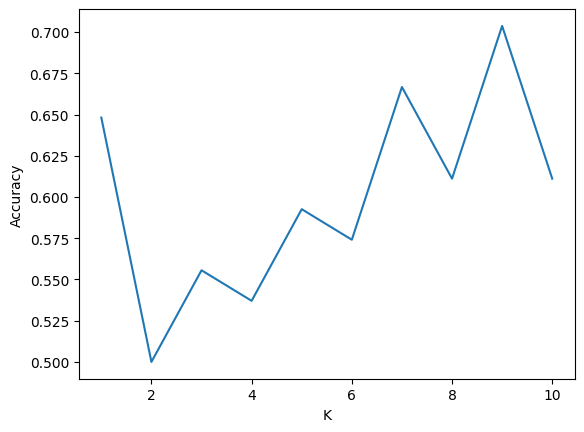

In [50]:
sns.lineplot(data=k_results_dic, x="K", y="Accuracy")

Clearly the classification of the flatten images using KNN is not going anywhere but I'm still going to discuss the results seriously.


The two bests values of K are 1 and 9. 

In [51]:
ret,y_pred_flat_knn,neighbours,dist = knn.findNearest(images_test_flat,k=9)

In [52]:
accuracy_flat_KNN = accuracy_score(y_test, y_pred_flat_knn)
accuracy_flat_KNN

0.7037037037037037

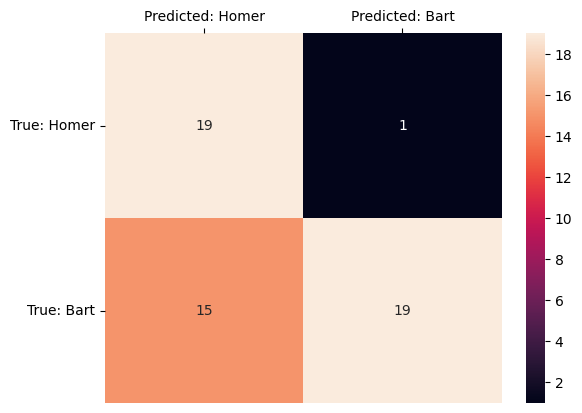

In [53]:
show_cmx(y_pred_flat_knn)

**With HOG**

In [54]:
knn_hog = cv2.ml.KNearest_create()
knn_hog.train(hogs_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [55]:
k_results_hog = []

for k in k_list:
    _,result,_,_ = knn_hog.findNearest(hogs_test,k=k)
    result = result.reshape(len(result))
    accuracy = sum((result == y_test)*1)/len(result)
    k_results_hog.append(accuracy)

In [56]:
k_results_hog_dic = {'K': k_list, 'Accuracy': k_results_hog}

<Axes: xlabel='K', ylabel='Accuracy'>

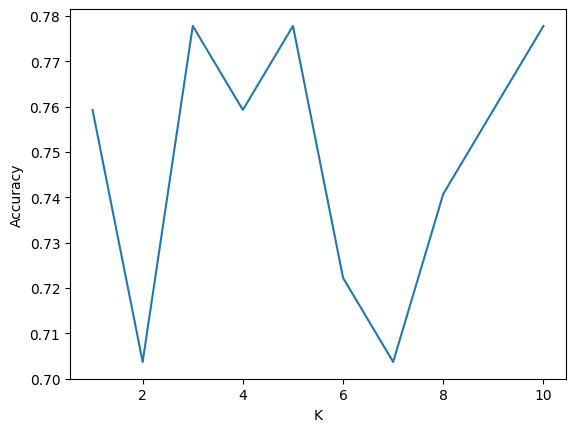

In [57]:
sns.lineplot(data=k_results_hog_dic, x="K", y="Accuracy")

In [58]:
ret,y_pred_hog_knn,neighbours,dist = knn_hog.findNearest(hogs_test,k=3)

In [59]:
accuracy_KNN = accuracy_score(y_test, y_pred_hog_knn)
accuracy_KNN

0.7777777777777778

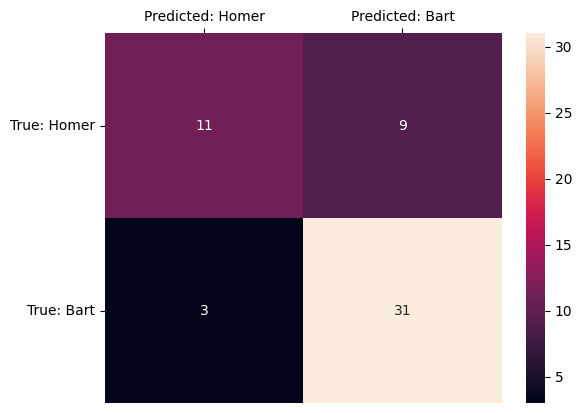

In [60]:
show_cmx(y_pred_hog_knn)

In [61]:
list_misclassified_knn = [i for i in range(len(y_test)) if y_test[i] != y_pred_hog_knn[i]]
list_misclassified_knn

[2, 9, 12, 14, 15, 20, 26, 34, 41, 44, 46, 48]

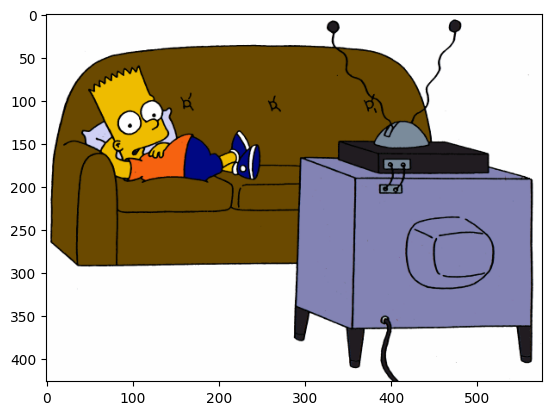

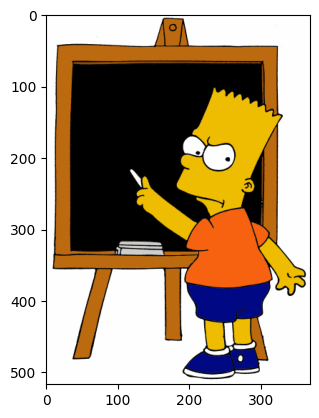

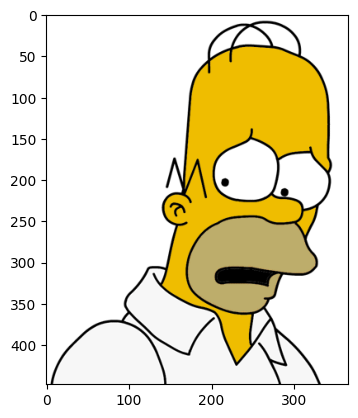

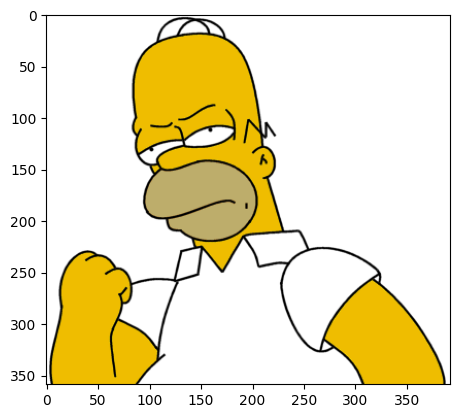

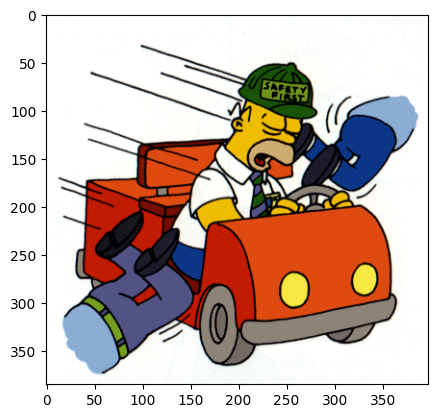

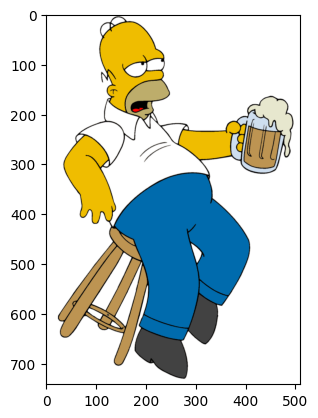

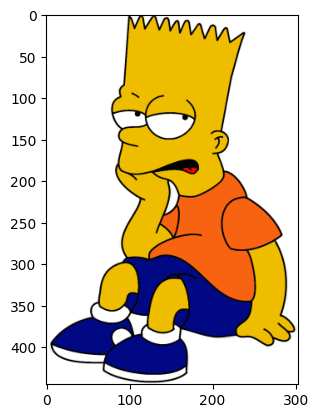

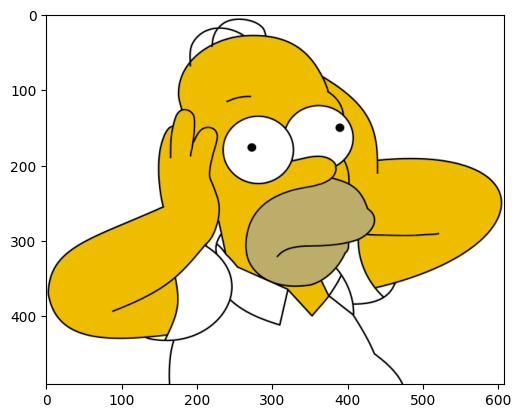

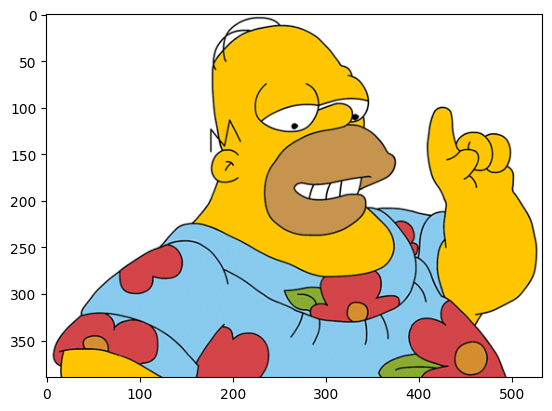

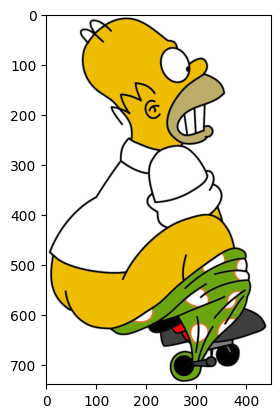

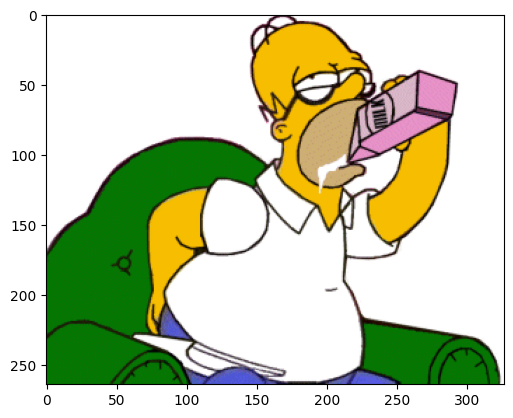

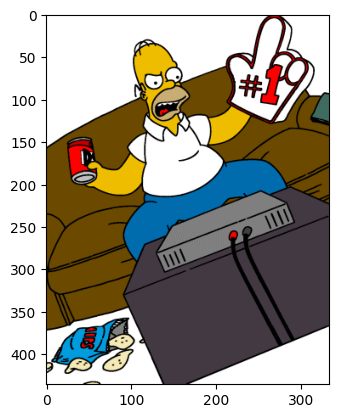

In [62]:
show_misclassified(list_misclassified_knn)

In [63]:
inter_list = list(set(list_misclassified_knn) & set(list_misclassified))
inter_list.sort()
inter_list

[12, 15, 20, 44]

In [64]:
complement_list = list(set(list_misclassified_knn) ^ set(list_misclassified))
complement_list.sort()
complement_list

[0, 1, 2, 9, 14, 17, 18, 26, 29, 34, 41, 45, 46, 48]

The intersection between the misclassified images of SVM and KNN with HOG features.

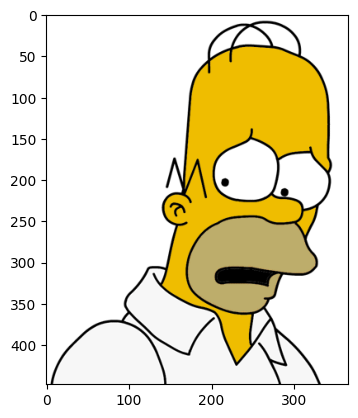

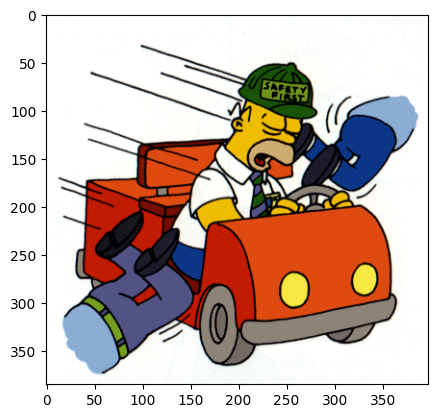

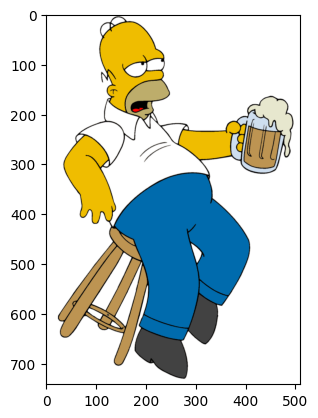

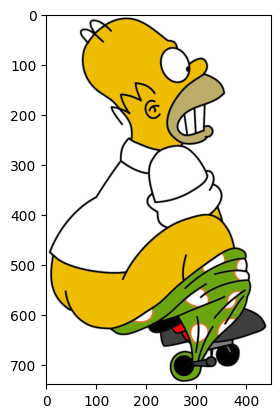

In [65]:
show_misclassified(inter_list)

In [66]:
results_dic = {'HOG': {'SVM': accuracy_SVM, 'KNN': accuracy_KNN }, 'Flat': {'SVM': accuracy_flat_SVM, 'KNN': accuracy_flat_KNN}}
results_dic = pd.DataFrame(results_dic)
results_dic

,HOG,Flat
SVM,0.814815,0.629630
KNN,0.777778,0.703704


# Conclusion for now

It's clearly better to use the HOG features instead of the flattened images. </br>

It is interesting to note that in a previous version of this notebook I was resizing the images without keeping the ratio and KNN with HOG features was working better than SVM. 